In [46]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

from scipy.interpolate import UnivariateSpline

# Reading data

CSV format

In [47]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Input data type

In [48]:
zeroformat=True

In [127]:
dir = "/home/rita13santos/Desktop/analyze/run4"#aqui/run2"#run4

1D output format

/home/rita13santos/Desktop/analyze/run4/monitorratio.txt


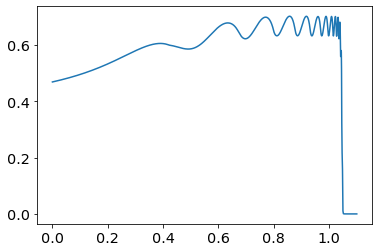

In [192]:
maxmonitorratio=[]
auxtime=[]
    
subdir = "/home/rita13santos/Desktop/analyze/run4/monitorratio.txt"#/home/rita13santos/Desktop/aqui/run2/monitorratio.txt"#dir+"/monitorratio.txt"

grid=[] 
print(subdir)
## reading 2D data
t=0

with open(subdir) as f:
    for line in f:
        
        index = line.find("Time")

        if index==1:
            t=t+1
            
            auxtime.append(float(line[index+7:len(line)-1]))
            
            auxgrid=[]
            auxdata=[]


        else:

            a=line.split()
            if a!=[]:
                
                auxgrid.append(float(a[0]))
                auxdata.append(float(a[1]))

            elif a==[]:


                    
                if t==1:
                    grid.append(auxgrid)
                L=len(auxgrid)

                maxmonitorratio.append(np.max(auxdata))
                    
#count=len(datatime[2])+1
#count

len(maxmonitorratio)

plt.plot(auxtime,maxmonitorratio)

In [45]:
print(len(maxmonitorratio))
print(len(auxtime))

maxmonitorratio[np.argmax(maxmonitorratio)]

1010
1010


0.70849567036

In [46]:
np.max(maxmonitorratio)

0.70849567036

In [47]:
print("time at which curvature peaks is ", auxtime[np.argmax(maxmonitorratio)])


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

t=find_nearest(time, auxtime[np.argmax(maxmonitorratio)])


print(len(maxmonitorratio))


#print(2*m/r)

time at which curvature peaks is  1.0430369706
1010


In [48]:
def get_max_curv_at_time(filename, t_input):
    m_value = None
    max_value = None
    in_target_block = False

    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue  # skip blank lines

            
            if line.startswith("\"Time"):
                
                current_time = float(line.split('=')[1].strip())
                in_target_block = abs(current_time - t_input) < 1e-9  # match the input time
                continue

            # If we are in the target block, process lines until next 'Time ='
            if in_target_block:
                # Try to parse two columns: left and right
                parts = line.split()
                if len(parts) == 2:
                    try:
                        
                        #print(parts)
                        x = float(parts[0])
                        m = float(parts[1])
                        if x != 0:  # avoid division by zero
                            val = 2 * m / x * (1-x)
                            if max_value is None or val > max_value:
                                #print("maxx\n\n")
                                max_value = val
                                m_value = m
                            
                            
                    except ValueError:
                        pass  # ignore lines that can't be parsed
                else:
                    # probably end of block
                    break

    return max_value, m_value


# Example usage:
t_input = auxtime[np.argmax(maxmonitorratio)]
filename = "/home/rita13santos/Desktop/aqui/run1/m.txt"
result = get_max_curv_at_time(filename, t_input)
print(f"Max m value at Time = {t_input} is: {result}")


Max m value at Time = 1.0430369706 is: (None, None)


In [22]:
m_scri[0]

0.10541916034

In [20]:
vars=["m", "beta", "xi", "derxi", "derderxi"]
time=[]
grid=[]

max_mon_rat=0

k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
xi_ori=[]
xi_scri=[]
derxi_ori=[]
derxi_scri=[]
derderxi_ori=[]
derderxi_scri=[]

isit_maxcurvature=False

k=1

for var in vars:
    dir = "/home/rita13santos/Desktop/aqui/run1/{}.txt".format(var)
        
        
        
    
    print(dir)

    with open(dir) as f:
        for line in f:
            
            index = line.find("Time")
            
            if index==1:
                if k==1:
                    time.append(float(line[index+7:len(line)-1]))
                    if float(line[index+7:len(line)-1])==t:
                        print("Timestep of maximum curvature!")
                        isit_maxcurvature=True
        
                auxgrid=[]
                auxdata=[]
                

            else:
                """if isit_maxcurvature==True:
                    print(isit_maxcurvature)"""
                a=line.split()
                if a!=[]:
                    if k==1:
                        auxgrid.append(float(a[0]))
                    
                    auxdata.append(float(a[1]))
                
                elif a==[]:
                    grid.append(auxgrid)
                    if k==1:
                        m_ori.append(auxdata[3])
                        m_scri.append(auxdata[len(auxdata)-4])
                        
                        """if isit_maxcurvature==True:
                            aa=np.divide(np.multiply(2,auxdata[4:len(auxdata)-5]),auxgrid[4:len(auxdata)-5])
                            print(np.max(aa))"""
                            
                        
                        """if np.max(aa)>max_mon_rat:
                            max_mon_rat=np.max(aa)"""
                        
                    elif k==2:
                        beta_ori.append(auxdata[3])
                        beta_scri.append(auxdata[len(auxdata)-4])
                    elif k==3:
                        xi_ori.append(auxdata[3])
                        xi_scri.append(auxdata[len(auxdata)-4])
                    elif k==4:
                        derxi_ori.append(auxdata[3])
                        derxi_scri.append(auxdata[len(auxdata)-4])
                    elif k==5:
                        derderxi_ori.append(auxdata[3])
                        derderxi_scri.append(auxdata[len(auxdata)-4])
                isit_maxcurvature=False
                        
                    
    k=k+1



/home/rita13santos/Desktop/aqui/run1/m.txt
/home/rita13santos/Desktop/aqui/run1/beta.txt
/home/rita13santos/Desktop/aqui/run1/xi.txt
/home/rita13santos/Desktop/aqui/run1/derxi.txt
/home/rita13santos/Desktop/aqui/run1/derderxi.txt


In [90]:
np.max(maxmonitorratio)

0.70245180826

In [89]:
max_mon_rat

0.7653005394029534

0D output format

In [128]:
res=1
vars=["m", "beta", "xi", "derxi", "derderxi"]
time=[]
grid=[]
"""m=[]
beta=[]
xi=[]
derxi=[]"""
k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
xi_ori=[]
xi_scri=[]
derxi_ori=[]
derxi_scri=[]
derderxi_ori=[]

maxmonitorratio=[]

for var in vars:
    
    
    subdir = dir+"/{}.txt".format(var)

    
    print(subdir)
    
    if zeroformat==False: ## reading 2D data
        t=0
        with open(subdir) as f:
            for line in f:

                index = line.find("Time")

                if index==1:
                    t=t+1
                    if k==1:
                        time.append(float(line[index+7:len(line)-1]))
                    auxgrid=[]
                    auxdata=[]


                else:

                    a=line.split()
                    if a!=[]:
                        if k==1:
                            auxgrid.append(float(a[0]))
                        auxdata.append(float(a[1]))

                    elif a==[]:


                        if k==1:
                            if t==1:
                                grid.append(auxgrid)
                            L=len(auxgrid)
                            m_ori.append(auxdata[3])
                            m_scri.append(auxdata[L-4])



                            monitor_ratio=[]
                            i=4
                            for m in auxdata[4:L-4]:
                                monitor_ratio.append(2*m/grid[0][i]*(1-grid[0][i]))
                                i=i+1
                            maxmonitorratio.append(np.max(monitor_ratio))




                        elif k==2:
                            beta_ori.append(auxdata[3])
                            beta_scri.append(auxdata[L-4])
                        elif k==3:
                            xi_ori.append(auxdata[3])
                            xi_scri.append(auxdata[L-4])
                        elif k==4:
                            derxi_ori.append(auxdata[3])
                            derxi_scri.append(auxdata[L-4])
                        elif k==5:
                            derderxi_ori.append(np.max(auxdata[3]))
    else: ## reading 0D data
        with open(subdir) as f:
            i=0
            for line in f:
                i=i+1
                a=line.split()
                #print("i = ", i, " a = ", a)
            
            
            
                #a=line.split()
            
                if k==1:
                    time.append(float(a[0]))
                    m_ori.append(float(a[1]))
                    m_scri.append(float(a[2]))
                elif k==2:
                    beta_ori.append(float(a[1]))
                    beta_scri.append(float(a[2]))
                elif k==3:
                    xi_ori.append(float(a[1]))
                    xi_scri.append(float(a[2]))
                elif k==4:
                    derxi_ori.append(float(a[1]))
                    derxi_scri.append(float(a[2]))
                elif k==5:
                    derderxi_ori.append(float(a[1]))
                
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/analyze/run4/m.txt
/home/rita13santos/Desktop/analyze/run4/beta.txt
/home/rita13santos/Desktop/analyze/run4/xi.txt
/home/rita13santos/Desktop/analyze/run4/derxi.txt
/home/rita13santos/Desktop/analyze/run4/derderxi.txt


####

# Styling plots

In [129]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':18,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# Convert central time to Bondi time

In [130]:
#trapezoidal rule
def trap_integrator(func,f0,x):
    integration=[f0]
    for i in range(0,len(x)-1):
        dx=x[i+1]-x[i]
    
        integral=dx/2*(func(x[i+1])+func(x[i]))
        
        integration.append(integration[i]+integral)
    return integration

#convert central time to bondi time
"""def converttobondi(time, beta_scri):

    spl = UnivariateSpline(time, np.multiply(np.exp(np.multiply(beta_scri,-2)),time), s=0)

    return trap_integrator(spl,0,time)

bonditime=converttobondi(time,beta_scri)"""
def converttobondi(time, beta_scri):

    spl = UnivariateSpline(time, np.exp(np.multiply(beta_scri,2)), s=0)

    return trap_integrator(spl,0,time)

bonditime=converttobondi(time,beta_scri)

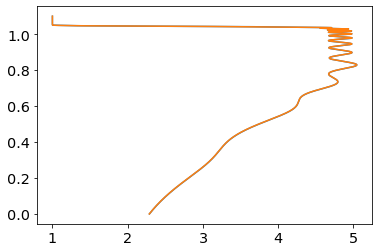

In [131]:
y=converttobondi(time,beta_scri)


dy=[]
edoisbeta=[]
for i in range(0, len(y)-1):
    dd=(y[i+1]-y[i])/(time[i+1]-time[i])
    dy.append(dd)
    edoisbeta.append(np.exp(2*beta_scri[i]))
    
plt.plot(dy,time[0:len(dy)])
plt.plot(edoisbeta,time[0:len(dy)])
#dy/dtime==e2beta

#print(dy)
#print(edoisbeta)

# Chi at origin

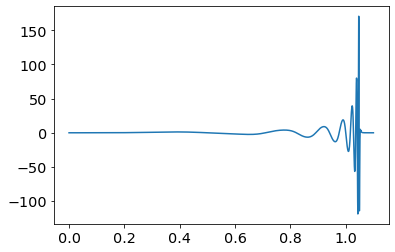

In [132]:
plt.plot(time, derderxi_ori)

Finding zero crossings

In [133]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derderxi_ori, s=0)

roots=spl.roots()
print("Number of zero crossing is ",len(roots))
#print(roots[k:(k+3)+1])


"""for kkkk in range(0,len(roots)-4):
    tau_star=(roots[0+kkkk]*roots[3+kkkk]-roots[1+kkkk]*roots[2+kkkk])/(roots[0+kkkk]-roots[1+kkkk]-roots[2+kkkk]+roots[3+k])

    print("Delta is ", 2*math.log((tau_star-roots[kkkk])/(tau_star-roots[kkkk+1])), " for k =", kkkk)"""

k=3

tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
print("\nTau star is ", tau_star)
print("Tau* is u* in my report")

Delta=2*math.log((tau_star-roots[k])/(tau_star-roots[k+1]))
print("\nDelta is ", Delta)

Number of zero crossing is  14

Tau star is  1.0534945575061658
Tau* is u* in my report

Delta is  0.7386032796992257


Using multiple crossings

In [135]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derderxi_ori, s=0)

roots=spl.roots()
print("Number of zero crossing is ",len(roots))
#print(roots[k:(k+3)+1])


"""for kkkk in range(0,len(roots)-4):
    tau_star=(roots[0+kkkk]*roots[3+kkkk]-roots[1+kkkk]*roots[2+kkkk])/(roots[0+kkkk]-roots[1+kkkk]-roots[2+kkkk]+roots[3+k])

    print("Delta is ", 2*math.log((tau_star-roots[kkkk])/(tau_star-roots[kkkk+1])), " for k =", kkkk)"""


kk=range(0,10)#5,11

final_Delta=[]
final_tau_star=[]
for k in kk:
    tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
    #print("\nTau star is ", tau_star)
    #print("Tau* is u* in my report")

    Delta=2*math.log((tau_star-roots[k])/(tau_star-roots[k+1]))
    #print("\nDelta is ", Delta)
    
    if abs(Delta-0.73)<0.01:#0.05 for runs with 2000 points
        
        print("\nDelta is ", Delta, " root ",roots[k])
        final_Delta.append(Delta)
        final_tau_star.append(tau_star)
        
avg=np.average(final_Delta)
tau=np.average(final_tau_star)
std_delta = np.std(final_Delta)
std_tau = np.std(final_tau_star)

print("average is ", avg, " std dev is ", std_delta)
print("average is ", tau, " std dev is ", std_tau)

# using the averaged values
tau_star=tau
Delta=avg

Number of zero crossing is  14

Delta is  0.7386032796992257  root  0.8916288610805628

Delta is  0.7399788001701839  root  0.9416102557717153

Delta is  0.735757565814872  root  0.9762314900862448

Delta is  0.7370816845435412  root  1.0000890210705147

Delta is  0.7333276062893604  root  1.016625209059126
average is  0.7369497873034366  std dev is  0.0023007798811850457
average is  1.0536744386550185  std dev is  0.00012811623498965038


In [136]:
#adapt_time = [-math.log(abs((tau_star-x))) for x in time[0:len(time)-1]]#0:len(time)-step:step]] #ignoring last timestep, where log(0)

adapt_time=[]

for x in time:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))

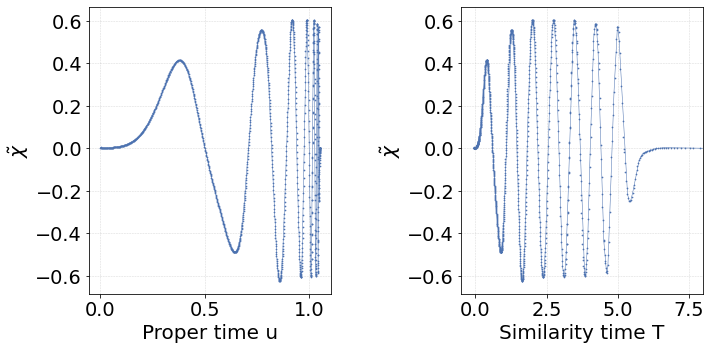

In [164]:
chitilde=[]
i=0
for tt in adapt_time:
    
    aux=np.exp(-tt)*1/2*derderxi_ori[i] #chi tilde = e^-T chi = e^-T (1/2 xi,rr)
    chitilde.append(aux)
    i=i+1

with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))


    ax1.plot(time[0:len(chitilde)],chitilde,linewidth=0.5)
    sc1=ax1.scatter(time[0:len(chitilde)],chitilde,s=0.5)
    ax1.set_xlabel("Proper time u",fontsize=20)
    ax1.set_ylabel(r"$\tilde{\chi}$",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    #ax1.set_xlim([1,1.1])
    
    ax2.plot(adapt_time,chitilde,linewidth=0.5)
    sc2=ax2.scatter(adapt_time,chitilde,s=0.5)
    """ax1.axvline(x=0.89)
    ax1.axvline(x=0.94)
    ax1.axvline(x=0.97)
    ax1.axvline(x=1)"""
    ax2.set_xlabel("Similarity time T",fontsize=20)
    ax2.set_ylabel(r"$\tilde{\chi}$",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    fig.tight_layout(pad=3.0)
    ax2.set_xlim([-0.5, 8])
    
    
    import matplotlib

    matplotlib.rcParams['path.simplify'] = True
    matplotlib.rcParams['path.simplify_threshold'] = 1  # adjust tolerance


    plt.savefig("final-plots-smaller-size/field.svg", format="svg", bbox_inches="tight")
    
    plt.show()
    

In [188]:
import numpy as np

def downsample(x, y, dx):
    xs = [x[0]]
    ys = [y[0]]
    last_x = x[0]
    for xi, yi in zip(x[1:], y[1:]):
        if xi - last_x >= dx:
            xs.append(xi)
            ys.append(yi)
            last_x = xi
    return np.array(xs), np.array(ys)

time_ds, chitilde_ds = downsample(time[0:len(chitilde)], chitilde, dx=0.01)
adapt_time_ds, chitilde_ds2 = downsample(adapt_time, chitilde, dx=0.01)


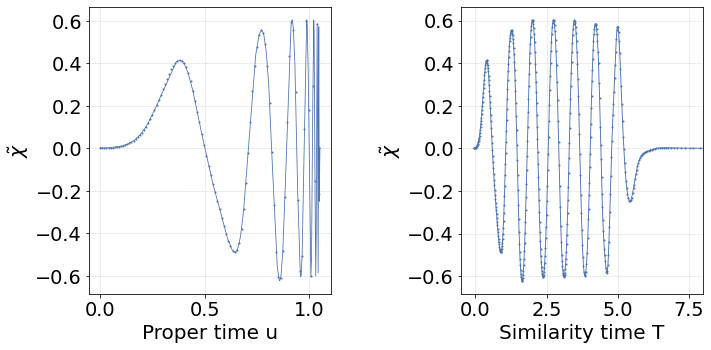

In [211]:
chitilde=[]
i=0
for tt in adapt_time:
    
    aux=np.exp(-tt)*1/2*derderxi_ori[i] #chi tilde = e^-T chi = e^-T (1/2 xi,rr)
    chitilde.append(aux)
    i=i+1

with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))


    ax1.plot(time[0:len(chitilde)],chitilde,linewidth=0.8)
    sc1=ax1.scatter(time_ds, chitilde_ds,s=1, rasterized=False)
    ax1.set_xlabel("Proper time u",fontsize=20)
    ax1.set_ylabel(r"$\tilde{\chi}$",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.4)
    #ax1.set_xlim([1,1.1])
    
    ax2.plot(adapt_time_ds, chitilde_ds2,linewidth=0.9)
    sc2=ax2.scatter(adapt_time_ds, chitilde_ds2,s=1, rasterized=False)
    """ax1.axvline(x=0.89)
    ax1.axvline(x=0.94)
    ax1.axvline(x=0.97)
    ax1.axvline(x=1)"""
    ax2.set_xlabel("Similarity time T",fontsize=20)
    ax2.set_ylabel(r"$\tilde{\chi}$",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.4)
    fig.tight_layout(pad=3.0)
    ax2.set_xlim([-0.5, 8])
    
    
    import matplotlib

    matplotlib.rcParams['path.simplify'] = True
    matplotlib.rcParams['path.simplify_threshold'] = 1  # adjust tolerance


    plt.savefig("final-plots-smaller-size/field.pdf", format="pdf", bbox_inches="tight",dpi=50)
    
    plt.show()
    

Compactness

In [194]:
auxtime_ds,maxmonitorratio_ds= downsample(auxtime,maxmonitorratio, dx=0.01)



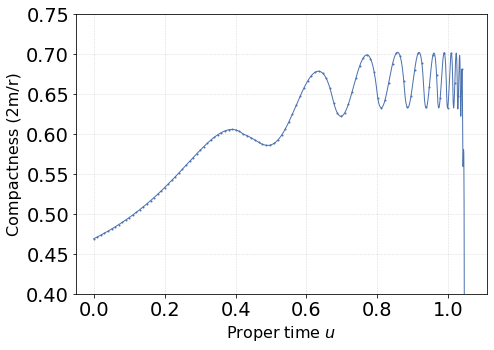

In [206]:
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16


    plt.plot(auxtime,maxmonitorratio,linewidth=1)
    plt.scatter(auxtime_ds,maxmonitorratio_ds,s=1,alpha=1)
    #plt.plot(converttobondi(time,beta_scri),maxmonitorratio,linewidth=0.5)
    #plt.scatter(converttobondi(time,beta_scri),maxmonitorratio,s=0.2,alpha=0.8)
    
    plt.xlim(-0.05, 1.11)
    plt.ylim(0.4, 0.75)
    plt.xlabel("Proper time $u$")#$\u03C4$")
    plt.ylabel("Compactness (2m/r)")#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    
    plt.tight_layout(pad=3.0)
    plt.savefig("final-plots-smaller-size/compactness.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

News function

In [214]:
bonditime_ds,news_ds= downsample(bonditime[0:len(adapt_time)],news[0:len(adapt_time)], dx=0.01)

bonditime_ds2,news_ds2= downsample(adapt_time[20:len(adapt_time)],news[20:len(adapt_time)], dx=0.01)



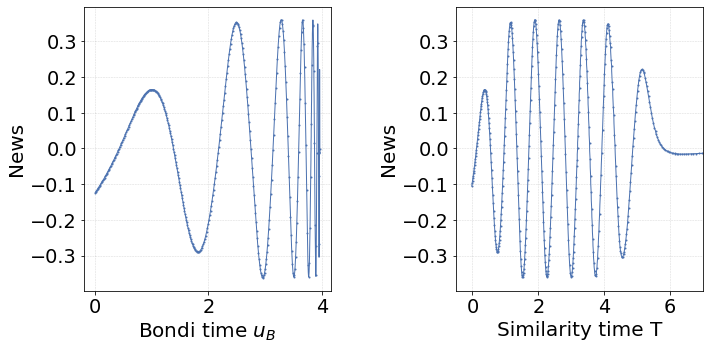

In [215]:
news=[]
for i in range(0, len(xi_scri)-1):
    
    #these look flat
    new=np.sqrt(2)*np.exp(2*beta_scri[i])*(xi_scri[i+1]-xi_scri[i])/(bonditime[i+1]-bonditime[i])#*
    new=np.sqrt(2)*(xi_scri[i+1]-xi_scri[i])/(time[i+1]-time[i])#*
    
    
    #new=np.sqrt(1/(-4*math.pi) *np.exp(-2*beta_scri[i])*(m_scri[i+1]-m_scri[i])/(time[i+1]-time[i]))#*
    news.append(new)
    
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'

    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))


    ax1.plot(bonditime[0:len(adapt_time)],news[0:len(adapt_time)],linewidth=1)
    ax1.scatter(bonditime_ds,news_ds,s=1)
    ax1.set_xlabel("Bondi time $u_B$",fontsize=20)
    ax1.set_ylabel("News",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    ax1.set_yticks([-0.3,-0.2,-0.1,0,0.1,0.2, 0.3])
    
    ax2.plot(adapt_time[20:len(adapt_time)],news[20:len(adapt_time)],linewidth=1)
    ax2.scatter(bonditime_ds2,news_ds2,s=1)
    ax2.set_xlabel("Similarity time T",fontsize=20)
    ax2.set_ylabel("News",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    ax2.set_yticks([-0.3,-0.2,-0.1,0,0.1,0.2, 0.3])
    fig.tight_layout(pad=3.0)
    ax2.set_xlim([-0.5,7])
    plt.savefig("final-plots-smaller-size/news.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

m at scri+

In [218]:
bonditime_ds,mplt_ds= downsample(bonditime[0:len(mplt)],mplt, dx=0.05)

adapttime_ds2,mplt_ds2= downsample(adapt_time,np.array(mplt), dx=0.05)



/tmp/ipykernel_7589/2700998622.py:39: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim([0.0001,0.0000])


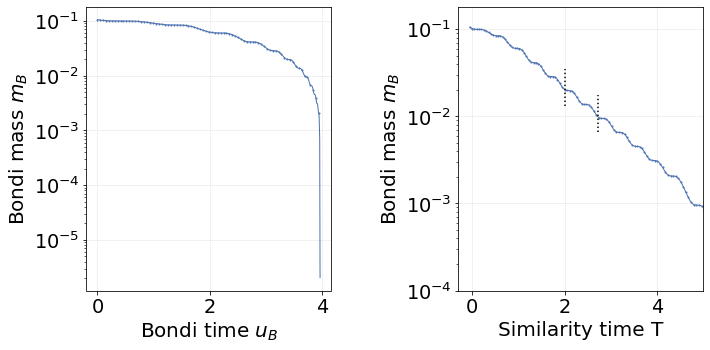

In [220]:
mplt=[]

i=0
for tt in adapt_time:
    
    aux=m_scri[i]#np.exp(-tt)*1/2*m_scri[i]
    mplt.append(aux)
    i=i+1
    
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    
    # time
    #ax1.scatter(bonditime[0:len(mplt)],mplt[0:len(mplt)],s=0.5)
    #ax1.plot(bonditime[0:len(mplt)],mplt[0:len(mplt)],linewidth=0.5)
    ax1.scatter(bonditime_ds,mplt_ds,s=1)
    ax1.plot(bonditime[0:len(mplt)],mplt,linewidth=1)
    ax1.set_ylabel("Bondi mass $m_B$", fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    #ax1.set_xlim([3.85,4])
    
    ax1.set_yscale('log')
    #ax1.set_xlabel("$\u03C4$")#T
    ax1.set_xlabel("Bondi time $u_B$", fontsize=20)#$\u03C4$")
    
    # adapt time
    
    #ax2.plot(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),linewidth=0.5)
    #ax2.scatter(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),s=0.5)
    ax2.plot(adapt_time,np.array(mplt),linewidth=1,alpha=1)
    ax2.scatter(adapttime_ds2,mplt_ds2,s=1,alpha=1)
    ax2.set_yscale('log')
    ax2.set_xlim([-0.3,5])
    ax2.set_ylim([0.0001,0.0000])
    ax2.set_ylabel("Bondi mass $m_B$", fontsize=20)
    ax2.set_xlabel("Similarity time T", fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    ax2.axvline(2,0.65,0.78,color='k',linestyle='dotted')
    ax2.axvline(2.73,0.56,0.69,color='k', linestyle='dotted')

    fig.tight_layout(pad=3.0)
    plt.savefig("final-plots-smaller-size/bontimass.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

numerical vs analytical mass loss

In [221]:
#chi,u
deruxi = []

for i in range(0, len(xi_scri)-1):
    aux=(xi_scri[i+1]-xi_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    deruxi.append(aux)

#theoretical mass loss

massloss=[]

for i in range(0, len(xi_scri)-1):
    aux=-8*math.exp(-4*beta_scri[i])*math.pi*deruxi[i]**2#this is m,ub, so its eq:masslossanalyticalym but translated to bondi
    #-8*math.exp(-2*beta_scri[i])*math.pi*deruxi[i]**2
    massloss.append(aux)



In [222]:
#experimental mass loss
masslossexp=[]
for i in range(0, len(m_scri)-1):
    aux=(m_scri[i+1]-m_scri[i])/(bonditime[i+1]-bonditime[i])##eq.59 from my report ref eq:news
    masslossexp.append(aux)

In [223]:
colors= plt.rcParams['axes.prop_cycle'].by_key()['color']                       
print('\n'.join(color for color in colors))                                      
#E24A33

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf


In [236]:
x_ds,y_ds= downsample(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp, dx=0.001)

x_ds2,y_ds2= downsample(converttobondi(time,beta_scri)[0:len(time)-1],massloss, dx=0.001)


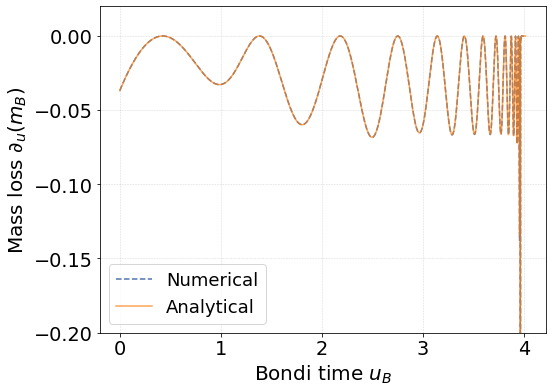

In [235]:

with plt.style.context('seaborn-v0_8-deep'):
    
    
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16


    
    plt.plot(x_ds,y_ds,label='Numerical',linewidth=1.5,linestyle="dashed")
    plt.plot(x_ds2,y_ds2,label='Analytical',linewidth=1.5,alpha=0.7,color='#ff7f0e')
    
    #plt.xlim(-0.01, 0.165)
    plt.xlabel("Bondi time $u_B$", fontsize=20)#$\u03C4$")
    plt.ylabel("Mass loss $\partial_u(m_B)$", fontsize=20)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    plt.ylim([-0.2,0.02])
    
    plt.legend(fontsize=18);

    plt.savefig("final-plots-smaller-size/massloss.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

Redshift factor

In [238]:
redshift=[]
for i in range(0, len(beta_scri)):
    #redshift.append(math.exp(2*beta[i][len(beta[0])-4])-1)
    #redshift.append(math.exp(2*beta_scri[i])-1)
    redshift.append(beta_scri[i])

In [241]:
time_ds,redshift_ds= downsample(time,redshift, dx=0.01)

x_ds2,y_ds2= downsample(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)], dx=0.01)


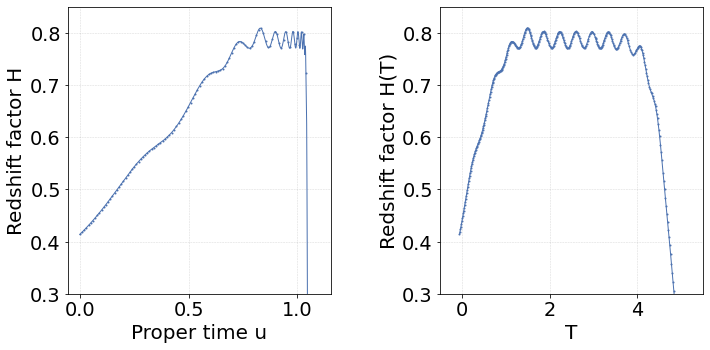

In [242]:

    
with plt.style.context('seaborn-v0_8-deep'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.plot(time,redshift,linewidth=1)
    ax1.scatter(time_ds,redshift_ds,s=1)
    ax1.set_xlabel("Proper time u",fontsize=20)#"$\u03C4$")
    ax1.set_ylabel("Redshift factor H",fontsize=20)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    ax1.set_ylim([0.3,0.85])
    
    ax2.plot(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)],linewidth=1)
    ax2.scatter(x_ds2,y_ds2,s=1)
    ax2.set_xlim([-0.5,5.5])
    ax2.set_ylim([0.3,0.85])
    ax2.set_xlabel("T",fontsize=20)
    ax2.set_ylabel("Redshift factor H(T)",fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    fig.tight_layout(pad=3.0)
    
    plt.savefig("final-plots-smaller-size/redshift.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [243]:
"""ax2.plot(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),linewidth=0.5)
    ax2.scatter(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),s=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([0,2])
    #ax2.set_ylim([0.01,0])
    ax2.set_ylabel("Bondi mass $m_B$", fontsize=20)
    ax2.set_xlabel("Similarity time T", fontsize=20)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)

    fig.tight_layout(pad=3.0)""";

Bondi mass at scri+

In [244]:
mplt=[]
for i in range(0, len(derpsi)):
    mplt.append(m[i][len(m[0])-4]) #saving derpsi at the origin for each timestep

with plt.style.context('seaborn-v0_8-deep'):
    
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    
    
    
    
    # time
    ax1.scatter(time,mplt,s=0.5)
    ax1.plot(time,mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass")
    #ax1.set_xlim([.8,1.04])
    #ax1.set_ylim([-0.001,0.002])
    ax1.set_yscale('log')
    ax1.set_xlabel("$\u03C4$")#T
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    # adapt time
    
    ax2.plot(adapt_time,np.array(mplt[0:len(adapt_time)]),linewidth=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([2.55,2.6])
    #ax2.set_ylim([-0.001,0.001])
    ax2.set_ylabel("Bondi mass")
    ax2.set_xlabel("T")
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    plt.show()

NameError: name 'derpsi' is not defined

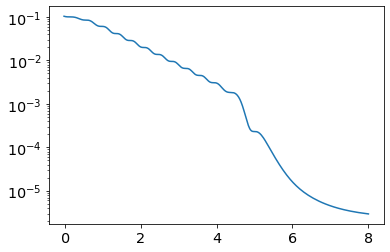

In [91]:
plt.plot(adapt_time[10:len(adapt_time)-3],np.array(mplt[10:len(adapt_time)-3]))
plt.yscale('log')

# Mass Scaling

In [119]:
from scipy.optimize import curve_fit
import matplotlib.ticker as mticker

In [120]:

dir = "/home/rita13santos/Desktop/6jun"#1
dir = "/home/rita13santos/Desktop/now"
dir = "/home/rita13santos/Desktop"
dir = "/home/rita13santos/Desktop/analyze"#1


#dir="/home/rita13santos/Desktop/aqui/supscaling"

In [89]:
masses=[]
amplitudes=[]




#subdir = dir+"/parameters2.csv"
subdir = dir+"/parameters7.csv"


    
import csv

with open(subdir) as f:
    i=0
    
    reader = csv.DictReader(f)
    
    for row in reader:
        
        print("A* ", row['Column2'], "mass ", row['Column8'])
        amplitudes.append(float(row['Column2']))
        masses.append(float(row['Column8']))


A*  0.08864099550907109 mass  0.0
A*  0.08864099550907109 mass  0.0
A*  0.08864099551238547 mass  0.0
A*  0.08864099551784994 mass  0.0
A*  0.08864099552685935 mass  0.0
A*  0.08864099554171334 mass  0.0
A*  0.08864099556620345 mass  0.0012732194210713923
A*  0.0886409956065808 mass  0.0018218267212426853
A*  0.08864099567315178 mass  0.0021883001465992907
A*  0.08864099578290881 mass  0.0025558839852811697
A*  2.1743595536651297e9 mass  0.0
A*  0.08864099626221804 mass  0.00310811902778121
A*  0.08864099675411487 mass  0.003569260110280827
A*  0.08864099756511562 mass  0.0038468927534141707
A*  0.08864099890222982 mass  0.004310654109647128
A*  0.08864100110675843 mass  0.004682730977977733


supercritical

In [90]:
amplitudes

[0.08864099550907109,
 0.08864099550907109,
 0.08864099551238547,
 0.08864099551784994,
 0.08864099552685935,
 0.08864099554171334,
 0.08864099556620345,
 0.0886409956065808,
 0.08864099567315178,
 0.08864099578290881,
 2174359553.6651297,
 0.08864099626221804,
 0.08864099675411487,
 0.08864099756511562,
 0.08864099890222982,
 0.08864100110675843]

In [111]:
masses=[0.003569260110280827]

amplitudes=[0.08864099675411487]



In [112]:

Astar=0.0886409955039620
"""
filtered_amplitudes, filtered_masses = zip(*[(a, m) for a, m in zip(amplitudes, masses) if -20.5 <= math.log(-(a-Astar)) <= -4.5])

print(list(filtered_amplitudes))  # Filtered x values
print(list(filtered_masses))  # Corresponding filtered y values""";

subcritical

In [121]:
amplitudes=[0.08864099549007405,
 0.08864099548106465,
 0.08864099546621065,
 0.08864099544172055,
 0.0886409954013432,
 0.08864099533477221,
 0.08864099522501519,
 0.08864099504405645,
 0.08864099474570596,
 0.08864099425380913]+[0.08864099344280837,
 0.08864099210569418,
 0.08864098990116556,
 0.08864098626651233,
 0.08864098027398225,
 0.08864097039397044,
 0.08864095410458481,
 0.08864092724792823,
 0.08864088296878728,
 0.08864080996482573]+[0.0886406896016415,0.08864049115629943,0.0886401639752429,
0.08863962454487562,
0.08863873517455502,
0.08863726885078992,
0.08863485129160867,
0.08863086541036337,
0.08862429380317176,
0.08861345905461225,
0.0885955955741995,
0.0885661436740743,
0.08851758569987532]+[0.08864099549314605,
 0.08864099548612953,
 0.08864099547456122,
 0.08864099545548831,
 0.0886409954240424,
 0.08864099537219686,
 0.08864099528671801,
 0.0886409951457872,
 0.0886409949134316,
 0.08864099453034197,
 0.08864099389873394]+[0.08864099389873394,
 0.08864099285738836,
 0.08864099114049974,
 0.08864098830982897,
 0.08864098364284184,
 0.08864097594828091,
 0.08864096326209463,
 0.08864094234610945,
 0.08864090786147981,
 0.08864085100593738,
 0.08864075726699525,
 0.08864060271760744,
 0.08864034790874441,
 0.08863992779995196,
 0.08863923515764983,
 0.08863809318355334,
 0.08863621038656987,
 0.0886331061791348,
 0.08862798820630793,
 0.08861955009564541,
 0.08860563800311158]+[0.08858270084023113,
 0.0885448838519006,
 0.08848253417884624,
 0.08843752713495136,
 0.08837973694666033,
 0.08830553287605948,
 0.0882102529633863,
 0.08808791113381416]

masses=[0.024697886075575565,
 0.023115060279442677,
 0.02077954881230433,
 0.02015024734279531,
 0.019974417805825415,
 0.019689925953953195,
 0.019233164310640705,
 0.01851099709824941,
 0.017393576639260958,
 0.01573602421756846]+[0.013432769995769554,
 0.010523221060253971,
 0.009596836439882819,
 0.009411573501558575,
 0.009117916086624068,
 0.00866304719713415,
 0.007983729996352329,
 0.007022274241213345,
 0.005761399032837494,
 0.00461711520476861]+[0.0045475916568842615,0.0044364420554456096,0.00426205018696188,0.003996279890467208,
        0.003608736760631016,0.003078683042227779,0.0024155819548563337,0.0021889567407866756,0.0021471845836153213,
        0.002080948280788837,0.0019783559767499732,0.0018250630998536777,0.0016079086624374516]+[0.02527013993961501,
 0.023987987789309682,
 0.02205033207697675,
 0.020211115630313442,
 0.020073183282147987,
 0.019849113786762625,
 0.019487986127191784,
 0.018912379071477546,
 0.01801096684151779,
 0.01664116215483618,
 0.014666472293844914]+[0.014666472293844914,
 0.01204231969392436,
 0.009661276052166655,
 0.00951505247685704,
 0.009281261737417636,
 0.00891442584113704,
 0.008355591749335808,
 0.007540848614885311,
 0.006427458783177841,
 0.005036252910212809,
 0.004586474079831943,
 0.004498409806750908,
 0.004358777048965328,
 0.004142518385285973,
 0.003819444276213717,
 0.0033619200433335486,
 0.002761352188402339,
 0.0022034894071399623,
 0.0021705149257310805,
 0.002117792801834351,
 0.0020350595121728862]+[0.0019089668375575947,
 0.0017250605709732262,
 0.0014734404034390835,
 0.0013227436711869178,
 0.001158479063726927,
 0.00098505829715855,
 0.0009643762966570011,
 0.0009556735795688817]

In [122]:
Astar=0.0886409955039620

filtered_amplitudes, filtered_masses = zip(*[(a, m) for a, m in zip(amplitudes, masses) if m>0])

In [123]:
#amplitudes=amplitudes[1:len(amplitudes)]
#masses=masses[1:len(masses)]

/tmp/ipykernel_5572/765403299.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xx, fit_eval, 'r-',linewidth=1.5,color='#1f77b4',alpha=0.5)


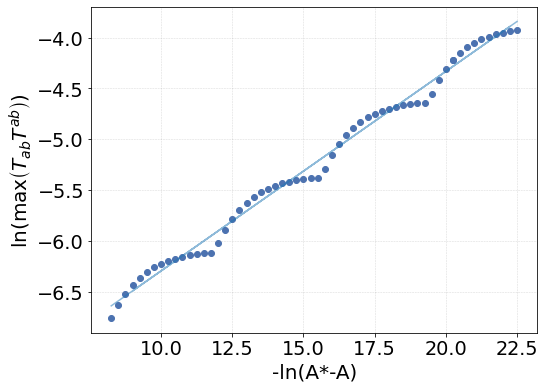

[ 0.1965564 -8.2627089]


0.19655640344427974

In [148]:

xx=[]
yy=[]

i=0
for x in filtered_amplitudes:
    
    if -math.log(-(x-Astar))<22.75 and -math.log(-(x-Astar))>8:
    #if -math.log(-(x-Astar))<23.1 and -math.log(-(x-Astar))>7.8:
        xx.append(-math.log(-(x-Astar)))
        yy.append(math.log(filtered_masses[i]))
    
    i=i+1
        
#xx=xx[2:len(xx)-11]
#yy=yy[2:len(yy)-11]




def func(x, a, b):

    return a * x + b


popt, pcov = curve_fit(func, xx, yy, p0=[0.1977, 0.0009])#,bounds=([0.197, -np.inf], [0.198, np.inf]))

fit_eval=[]
for x in xx:
    fit_eval.append(func(x, popt[0], popt[1]))

    

with plt.style.context('seaborn-v0_8-deep'):
    plt.figure(figsize=(8,6))
    plt.rcParams["figure.figsize"] = (8,6)
    #plt.rcParams["font.size"]= 20
    plt.rcParams["font.size"]= 16
    plt.rcParams["legend.fontsize"]= 16

    #plt.rcParams["legend.fontsize"]= 18
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    plt.scatter(xx,yy)
    
    plt.plot(xx, fit_eval, 'r-',linewidth=1.5,color='#1f77b4',alpha=0.5)
    
    plt.xlabel("-ln(A*-A)", fontsize=20)#$\u03C4$")
    #plt.ylabel(r"ln(m$_{BH}$)", fontsize=20)#$\u03C4$")
    plt.ylabel(r"ln(max$\left(T_{ab}T^{ab}\right)$)", fontsize=20)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))

    #plt.legend(fontsize=18);

    plt.savefig("subcriticalscaling.pdf", format="pdf", bbox_inches="tight")
    #plt.xlim(-19,-26)
    #plt.ylim(-0.354,-0.3530)


    
    #plt.plot(xx,np.subtract(np.multiply(xx,0.1977),8.2))
    plt.show()
    
    
print(popt)
popt[0]

In [162]:
np.sort(xx)

array([ 8.25      ,  8.5       ,  8.75      ,  9.        ,  9.25      ,
        9.5       ,  9.75      , 10.        , 10.25      , 10.5       ,
       10.75      , 11.        , 11.25      , 11.5       , 11.75      ,
       12.        , 12.25      , 12.5       , 12.75      , 13.        ,
       13.25      , 13.5       , 13.75      , 14.        , 14.25      ,
       14.5       , 14.75      , 15.        , 15.25      , 15.5       ,
       15.75      , 16.        , 16.25      , 16.5       , 16.75      ,
       17.        , 17.25      , 17.5       , 17.75      , 18.        ,
       18.25      , 18.5       , 18.75      , 19.        , 19.25      ,
       19.5       , 19.75      , 20.        , 20.25      , 20.25      ,
       20.5       , 20.75      , 21.        , 21.25      , 21.49999999,
       21.74999999, 22.        , 22.25000003, 22.50000003])

In [150]:
residuals = np.array(yy) - np.array(fit_eval)
SSR = np.sum(residuals**2)
print("Sum of squared residuals:", SSR)
MSE = np.mean(residuals**2)
print("Mean squared error:", MSE)
RMSE = np.sqrt(MSE)
print("Root mean squared error:", RMSE)

Sum of squared residuals: 0.3649206888398933
Mean squared error: 0.006185096421015141
Root mean squared error: 0.07864538397779708


In [151]:
perr=np.sqrt(np.diag(pcov))

In [152]:
print("We obtain a gamma value of ",popt[0]," +/ ",perr[0])#<5.5

We obtain a gamma value of  0.19655640344427974  +/  0.0024819773547104106


In [153]:
popt
pcov

np.sqrt(np.diag(pcov))

array([0.00248198, 0.0397545 ])

/tmp/ipykernel_5572/1967454709.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_sorted, y_sorted, 'r-',linewidth=1.5,alpha=0.7,color='#1f77b4')


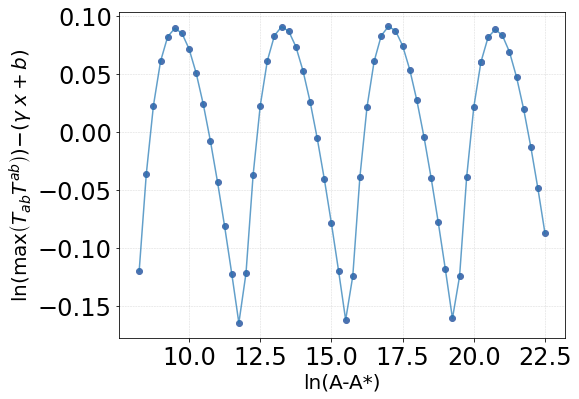

[ 0.1965564 -8.2627089]


0.19655640335196078

In [168]:

Astar=0.0886409955039620

"""

xx=[]
yy=[]

i=0
for x in amplitudes:

    xx.append(math.log(-(x-Astar)))
    yy.append(math.log(masses[i]))
    i=i+1"""
        

def func(x, a, b):

    return a * x + b


popt, pcov = curve_fit(func, xx, yy)

fit_eval=[]
yy_new=[]
i=0
for x in xx:
    fit_eval.append(func(x, popt[0], popt[1]))
    #print(yy[i]-func(x, popt[0], popt[1]))
    yy_new.append(yy[i]-func(x, popt[0], popt[1]))
    i=i+1
   
    
with plt.style.context('seaborn-v0_8-deep'):
    plt.figure(figsize=(8,6))
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 20
    plt.rcParams["legend.fontsize"]= 18
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    plt.scatter(xx,yy_new)
    
    sorted_indices = np.argsort(xx)
    x_sorted = np.array(xx)[sorted_indices]
    y_sorted = np.array(yy_new)[sorted_indices]
    plt.plot(x_sorted, y_sorted, 'r-',linewidth=1.5,alpha=0.7,color='#1f77b4')
    
    plt.xlabel("ln(A-A*)", fontsize=20)#$\u03C4$")
    plt.ylabel(r"ln(max$\left(T_{ab}T^{ab}\right)$)$-(\gamma \; x+b)$", fontsize=20)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    
    """plt.axvline(x=-21)
    plt.axvline(x=-17)
    plt.axvline(x=-13.5)"""
    plt.xticks([10,12.5,15,17.5,20,22.5])
    
    #plt.legend(fontsize=18);

    plt.savefig("scalingminusfit.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()



print(popt)
popt[0]

In [ ]:
((21-17)+(17-13.5))/2